In [9]:
%matplotlib inline
from pathlib import Path
import plotnine as PN
import io
import pandas as pd
import numpy as np
import os
import sys
import seaborn as sns
import palettable
sys.path.insert(0, os.path.abspath('nb'))
import vcnmodel.VS_data as VS_data
import matplotlib.pyplot as mpl
from matplotlib import scale as mscale
from  pylibrary.plotting import plothelpers as PH
import toml
config = toml.load(open("../wheres_my_data.toml", "r"))
from matplotlib import transforms as mtransforms
from matplotlib import ticker

def reset_style():
#     sns.set_style(rc={"pdf.fonttype": 42})
    mpl.style.use("~/.matplotlib/figures.mplstyle")
        
datas = VS_data.data
sio = io.StringIO(datas)
df = pd.read_table(sio, sep=",")
df = df[~np.isnan(df.VectorStrength)]
# df.dropna(subset=['VectorStrength'], inplace=True)
# df.Cell = df.Cell.astype(str)
df[df.SpikeCount < 500]
# p = df.RayleighP.values
# p[np.isnan(p)] = 1
# p[np.isinf(p)] = 1e-6
# # print(np.log10(p))
# p[p<1e-6] = 1e-6
# p = 1. - p
# p = np.clip(p, a_max=1, a_min=0)
# p = p/np.max(p)
#np.max((1./df.RayleighP.values, 1000.))
# df.RayleighP = p*p

df = df.sort_values(["Cell", "frequency", "Configuration"], ascending = (True, True, True))
df.head(10)
reset_style()
# print(dir(PN))

In [12]:
class SquareRootScale(mscale.ScaleBase):
    """
    ScaleBase class for generating square root scale.


    Pulled from a stack overflow answer:
    https://stackoverflow.com/questions/42277989/square-root-scale-using-matplotlib-python

    Usage:
        fig, ax = plt.subplots(1)

        ax.plot(np.arange(0, 9)**2, label='$y=x^2$')
        ax.legend()

        ax.set_yscale('squareroot')
        ax.set_yticks(np.arange(0,9,2)**2)
        ax.set_yticks(np.arange(0,8.5,0.5)**2, minor=True)

        plt.show()

    Because this registers the class in the matplotlib.scale module, it should be
    just "usable" by specifying the 'squareroot' scale.

    """

    name = "squareroot"

    def __init__(self, axis, **kwargs):
         super().__init__(axis)
#             mscale.ScaleBase.__init__(self)

    def set_default_locators_and_formatters(self, axis):
        axis.set_major_locator(ticker.AutoLocator())
        axis.set_major_formatter(ticker.ScalarFormatter())
        axis.set_minor_locator(ticker.NullLocator())
        axis.set_minor_formatter(ticker.NullFormatter())

    def limit_range_for_scale(self, vmin, vmax, minpos):
        return max(0.0, vmin), vmax

    class SquareRootTransform(mtransforms.Transform):
        input_dims = 1
        output_dims = 1
        is_separable = True

        def transform_non_affine(self, a):
            return np.array(a) ** 2

        def inverted(self):
            return SquareRootScale.InvertedSquareRootTransform()

    class InvertedSquareRootTransform(mtransforms.Transform):
        input_dims = 1
        output_dims = 1
        is_separable = True

        def transform(self, a):
            return np.array(a) ** 0.5

        def inverted(self):
            return SquareRootScale.SquareRootTransform()

    def get_transform(self):
        return self.SquareRootTransform()


mscale.register_scale(SquareRootScale)

     Cell Configuration  frequency   dmod    dB  VectorStrength  SpikeCount  \
81      9           all      100.0  100.0  20.0          0.5664       10431   
78      9           all      200.0  100.0  20.0          0.9563       14998   
75      9           all      300.0  100.0  20.0          0.8454       20834   
72      9           all      400.0  100.0  20.0          0.7196       17835   
69      9           all      500.0  100.0  20.0          0.6185       15755   
66      9           all      750.0  100.0  20.0          0.3392       15756   
63      9           all     1000.0  100.0  20.0          0.1233       15522   
102    10           all      100.0  100.0  20.0          0.9051        7869   
99     10           all      200.0  100.0  20.0          0.9571       14982   
96     10           all      300.0  100.0  20.0          0.8388       16466   
93     10           all      400.0  100.0  20.0          0.7755       12412   
90     10           all      500.0  100.0  20.0     

<ipython-input-12-ee00612c01de>:58: RuntimeWarning: invalid value encountered in sqrt


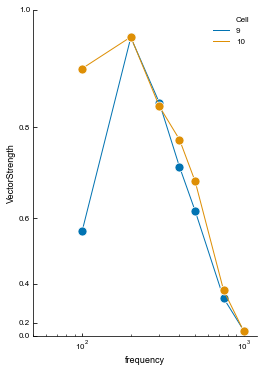

SyntaxError: 'return' outside function (<ipython-input-27-ae129ba598cd>, line 45)

In [27]:
"""
Plot selected cells for a poster, 1 column, two rows
"""

def getCell(cell):
    return(f"VCN_c{int(cell):02d}")
# df = df.sort_values('Cell')
labels=set(df['frequency'])
labels = [str(int(l)) for l in sorted(labels)]

def scalefun(x):
    return [f"{y:.2f}" for y in x]

# filter the data to just cells 9 and 10, and the standard configuration "all"

df = df[df["Cell"].isin([9, 10])] 
# further on configuration
df = df[df["Configuration"].isin(["all"])]

print(df.head(20))
f, ax = mpl.subplots(figsize=(4, 6))
print(ax)
ax.set_yscale('squareroot')
sns.lineplot(data=df, 
    x="frequency", y='VectorStrength',
    hue="Cell", marker='o', markersize=9,
                 ax=ax, palette="colorblind"
)


ax.set_xlim(50, 1200)
ax.set_xscale("log")
ax.set_ylim((0, 1))
save_file="Compare_VS_Cells.pdf"
# mpl.savefig(
#     Path(config["baseDataDirectory"], "Figures", save_file),
#     metadata={
#         "Creator": "Paul Manis",
#         "Author": "Paul Manis",
#         "Title": "SBEM Project Figure 6 Modeling : Vector Strength Summary-cells9-10",
#     },
# )
     
mpl.show()
return

/Users/pbmanis/Desktop/Python/VCNModel/vcn_venv/lib/python3.8/site-packages/plotnine/scales/scales.py:29: PlotnineWarning: Scale for 'x' is already present.
Adding another scale for 'x',
which will replace the existing scale.

/Users/pbmanis/Desktop/Python/VCNModel/vcn_venv/lib/python3.8/site-packages/plotnine/scales/scales.py:29: PlotnineWarning: Scale for 'y' is already present.
Adding another scale for 'y',
which will replace the existing scale.

/Users/pbmanis/Desktop/Python/VCNModel/vcn_venv/lib/python3.8/site-packages/plotnine/geoms/geom_path.py:81: PlotnineWarning: geom_path: Each group consist of only one observation. Do you need to adjust the group aesthetic?


Text(0.99, 0.99, 'Fig_M6_VS_SAM.pdf')

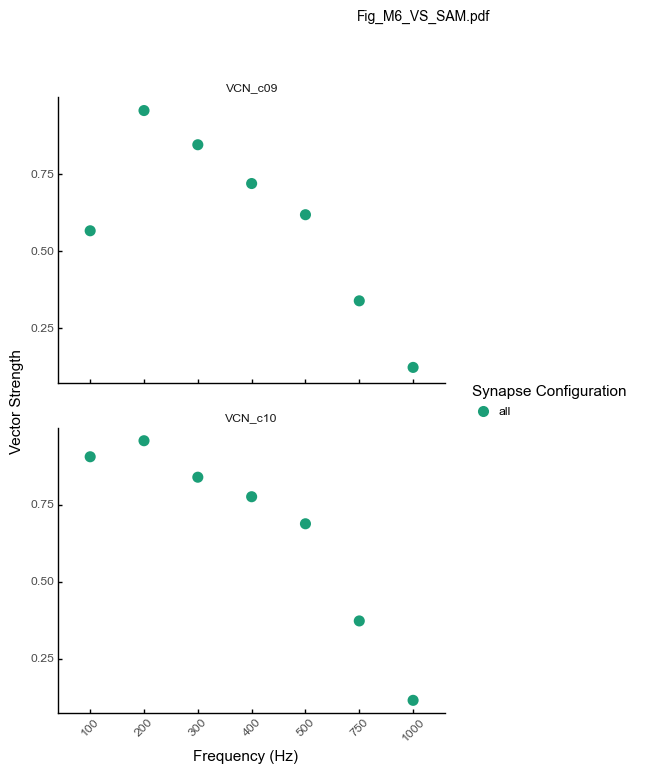

In [15]:
dodge = PN.positions.position_dodge(width=0.6)
themer = PN.themes.theme
gg = (PN.ggplot(df, 
                PN.aes(x='factor(frequency)',
                           y='VectorStrength',
                           group='factor(frequency)',
                           color='factor(Configuration)',
                          ))
             + PN.scale_x_discrete()
             + PN.geom_point(
                   PN.aes(
                        x='factor(frequency)',
                        y='VectorStrength',
                        inherit=True,
#                         size=1.5,
                    ),
                    stroke=1,
                    position=PN.positions.position_dodge2(width=1),
                 #position=PN.positions.position_jitterdodge(jitter_width=1, dodge_width=1),
                    alpha=1, 
                   size=2.5,
             )
              +PN.labs(x="Frequency (Hz)", y="Vector Strength", color="Synapse Configuration")
               +PN.geom_line(
                  PN.aes(x='factor(frequency)',
                  y='VectorStrength',
                  ),
#                     position=PN.positions.position_dodge2(width=1),
                    alpha=1,
                    color='grey',
               )
               + PN.scales.scale_colour_brewer(type="qual", palette="Dark2")
               + PN.facet_wrap('Cell', labeller=getCell, nrow=5, ncol=2, dir='v')
               + PN.theme_minimal() # (style='whitegrid')
      + PN.theme(text=PN.element_text(family='Arial', ))
      + PN.themes.theme(panel_grid_minor = PN.element_blank())
      + PN.themes.theme(panel_grid_major = PN.element_blank())
      + PN.themes.theme(panel_spacing_x = 0.5,)
      + PN.themes.theme(panel_spacing_y = 0.25,)

      + PN.themes.theme(axis_line = PN.element_rect())
      + PN.themes.theme(axis_line = PN.element_rect())
      
      + PN.themes.theme(axis_ticks_length=20,)
      + PN.themes.theme(axis_ticks_length_minor=0,)
      + PN.themes.theme(axis_ticks_length_major=3,)
      + PN.themes.theme(axis_ticks_direction='in')
      + PN.themes.theme(axis_ticks=PN.element_line(size=1),)
      + PN.themes.theme(axis_ticks_pad=20,)
  
      + PN.themes.theme(axis_ticks_major=PN.element_line(color='k'),)
      + PN.themes.theme(axis_ticks_major_x=PN.element_line(size=1), ) 
      + PN.themes.theme(axis_ticks_major_y=PN.element_line(color='k'),)
  
      + PN.themes.theme(axis_ticks_minor=PN.element_line(color='k'),)
      + PN.themes.theme(axis_ticks_minor_x=PN.element_line(size=0),   )
      + PN.themes.theme(axis_ticks_minor_y=PN.element_line(color='k'),)
      
      + PN.themes.theme(axis_text_x=PN.element_text(angle=45))
      + PN.themes.theme(figure_size=(5, 8))
      + PN.scale_x_discrete(labels=labels)

      + PN.scales.ylim(-0.1, 1.) 

      + PN.scales.scale_y_continuous(labels=[f"{f:.2f}" for f in [0, 0.25, 0.5, 0.75, 1.0]]) # scalefun) # PN.scales.number_format(accuracy = 0.01))
      
     )
# print(dir(PN.scales))

fig, P = gg.draw(return_ggplot = True)

for i, ax in enumerate(P.axs):
    ax.tick_params(left=True, bottom=True)

save_file = f"Fig_M6_VS_SAM.pdf"

fig.text(
    0.99,
    0.99,
    save_file,  # .replace('_', '\_'),
    transform=fig.transFigure,
    horizontalalignment="right",
    verticalalignment="top",
)


# mpl.savefig(
#     Path(config["baseDataDirectory"], "Figures", save_file),
#     metadata={
#         "Creator": "Paul Manis",
#         "Author": "Paul Manis",
#         "Title": "SBEM Project Figure 6 Modeling : Vector Strength Summary",
#     },
# )
     

/Users/pbmanis/Desktop/Python/VCNModel/vcn_venv/lib/python3.8/site-packages/plotnine/scales/scales.py:29: PlotnineWarning: Scale for 'x' is already present.
Adding another scale for 'x',
which will replace the existing scale.

/Users/pbmanis/Desktop/Python/VCNModel/vcn_venv/lib/python3.8/site-packages/plotnine/scales/scales.py:29: PlotnineWarning: Scale for 'y' is already present.
Adding another scale for 'y',
which will replace the existing scale.



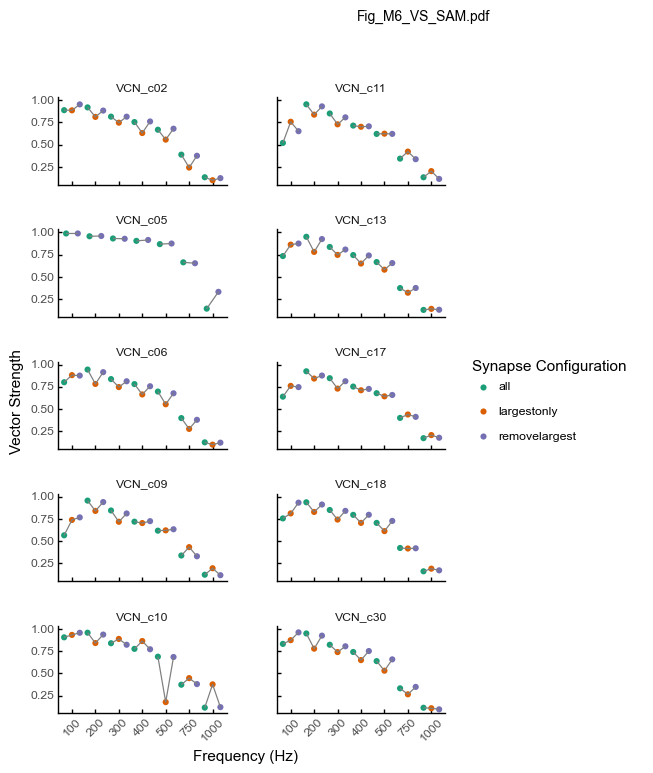

In [2]:
"""
Plot all the cells in two columns using ggplot
"""

def getCell(cell):
    return(f"VCN_c{int(cell):02d}")
# df = df.sort_values('Cell')
labels=set(df['frequency'])
labels = [str(int(l)) for l in sorted(labels)]

def scalefun(x):
    return [f"{y:.2f}" for y in x]

dodge = PN.positions.position_dodge(width=0.6)
themer = PN.themes.theme
gg = (PN.ggplot(df, 
                PN.aes(x='factor(frequency)',
                           y='VectorStrength',
                           group='factor(frequency)',
                           color='factor(Configuration)',
                          ))
             + PN.scale_x_discrete()
             + PN.geom_point(
                   PN.aes(
                        x='factor(frequency)',
                        y='VectorStrength',
                        inherit=True,
#                         size=1.5,
                    ),
                    stroke=0,
                    position=PN.positions.position_dodge2(width=1),
                 #position=PN.positions.position_jitterdodge(jitter_width=1, dodge_width=1),
                    alpha=1, 
                   size=2.5,
             )
              +PN.labs(x="Frequency (Hz)", y="Vector Strength", color="Synapse Configuration")
               +PN.geom_line(
#                   PN.aes(x='factor(frequency)',
#                   y='VectorStrength',
#                   ),
                    position=PN.positions.position_dodge2(width=1),
                    alpha=1,
                    color='grey',
               )
               + PN.scales.scale_colour_brewer(type="qual", palette="Dark2")
               + PN.facet_wrap('Cell', labeller=getCell, nrow=5, ncol=2, dir='v')
               + PN.theme_minimal() # (style='whitegrid')
      + PN.theme(text=PN.element_text(family='Arial', ))
      + PN.themes.theme(panel_grid_minor = PN.element_blank())
      + PN.themes.theme(panel_grid_major = PN.element_blank())
      + PN.themes.theme(panel_spacing_x = 0.5,)
      + PN.themes.theme(panel_spacing_y = 0.25,)

      + PN.themes.theme(axis_line = PN.element_rect())
      + PN.themes.theme(axis_line = PN.element_rect())
      
      + PN.themes.theme(axis_ticks_length=20,)
      + PN.themes.theme(axis_ticks_length_minor=0,)
      + PN.themes.theme(axis_ticks_length_major=3,)
      + PN.themes.theme(axis_ticks_direction='in')
      + PN.themes.theme(axis_ticks=PN.element_line(size=1),)
      + PN.themes.theme(axis_ticks_pad=20,)
  
      + PN.themes.theme(axis_ticks_major=PN.element_line(color='k'),)
      + PN.themes.theme(axis_ticks_major_x=PN.element_line(size=1), ) 
      + PN.themes.theme(axis_ticks_major_y=PN.element_line(color='k'),)
  
      + PN.themes.theme(axis_ticks_minor=PN.element_line(color='k'),)
      + PN.themes.theme(axis_ticks_minor_x=PN.element_line(size=0),   )
      + PN.themes.theme(axis_ticks_minor_y=PN.element_line(color='k'),)
      
      + PN.themes.theme(axis_text_x=PN.element_text(angle=45))
      + PN.themes.theme(figure_size=(5, 8))
      + PN.scale_x_discrete(labels=labels)

      + PN.scales.ylim(-0.1, 1.) 

      + PN.scales.scale_y_continuous(labels=[f"{f:.2f}" for f in [0, 0.25, 0.5, 0.75, 1.0]]) # scalefun) # PN.scales.number_format(accuracy = 0.01))
      
     )
# print(dir(PN.scales))

fig, P = gg.draw(return_ggplot = True)

for i, ax in enumerate(P.axs):
    ax.tick_params(left=True, bottom=True)

save_file = f"Fig_M6_VS_SAM.pdf"

fig.text(
    0.99,
    0.99,
    save_file,  # .replace('_', '\_'),
    transform=fig.transFigure,
    horizontalalignment="right",
    verticalalignment="top",
)
mpl.savefig(
    Path(config["baseDataDirectory"], "Figures", save_file),
    metadata={
        "Creator": "Paul Manis",
        "Author": "Paul Manis",
        "Title": "SBEM Project Figure 6 Modeling : Vector Strength Summary",
    },
)
        
# fig.savefig('/Users/pbmanis/Desktop/Python/VCN-SBEM-Data/Figures/Fig_M6_VS_SAM.pdf')